In [1]:
import mlflow
import mlflow.sklearn

Rodar no prompt dentro do ambiente anaconda

mlflow ui

In [2]:
from sklearn.datasets import load_boston

In [3]:
X,y = load_boston(return_X_y=True)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import median_absolute_error

In [7]:
mlflow.set_experiment('1')

In [8]:
with mlflow.start_run():
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    score = lr.score(X_test,y_test)
    mlflow.log_metric('r2',score)
    mlflow.sklearn.log_model(lr,'model')
    mlflow.log_metric('mae',median_absolute_error(y_test,lr.predict(X_test)))

2021/02/06 13:11:06 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



In [9]:
from sklearn.neighbors import KNeighborsRegressor

In [10]:
for k in range(1,11):
    with mlflow.start_run():
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train,y_train)
        score = knn.score(X_test,y_test)
        mlflow.log_param('k',k)
        mlflow.log_param('modelo','knn')
        mlflow.log_metric('r2',score)
        mlflow.sklearn.log_model(knn,'model')
        mlflow.log_metric('mae',median_absolute_error(y_test,knn.predict(X_test)))
        mlflow.log_metric('r2_treino',knn.score(X_train,y_train))
        mlflow.log_metric('mae_treino',median_absolute_error(y_train,knn.predict(X_train)))

In [11]:
mlflow.set_experiment('autoflow2')

In [12]:
mlflow.sklearn.autolog()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [14]:
X,y=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [15]:
for est in [50,100,200]:
    for max_depth in list(range(1,11))+[None]:
        with mlflow.start_run():
            rf = RandomForestClassifier(n_estimators=est, max_depth=max_depth)
            rf.fit(X_train,y_train)
            preds = rf.predict(X_test)
            mlflow.log_metric('accuracy',accuracy_score(y_test,preds))
            mlflow.log_metric('precision',precision_score(y_test,preds))
            mlflow.log_metric('recall',recall_score(y_test,preds))
            mlflow.log_metric('f1',f1_score(y_test,preds))
            print('\n')

2021/02/06 13:11:07 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '3a0e188079254ad0aa6ef8c7739b1a91'
2021/02/06 13:11:07 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '3a0e188079254ad0aa6ef8c7739b1a91'
2021/02/06 13:11:07 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '3a0e188079254ad0aa6ef8c7739b1a91'
2021/02/06 13:11:07 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:09 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '9a36e52fa25e49cd8a37bb3b673f3075'
2021/02/06 13:11:09 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '9a36e52fa25e49cd8a37bb3b673f3075'
2021/02/06 13:11:09 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '9a36e52fa25e49cd8a37bb3b673f3075'
2021/02/06 13:11:09 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:09 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'fdac337d6b50433584d91cc6b61e40b3'
2021/02/06 13:11:09 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'fdac337d6b50433584d91cc6b61e40b3'
2021/02/06 13:11:09 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'fdac337d6b50433584d91cc6b61e40b3'
2021/02/06 13:11:09 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:10 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '11aae19f52cd4057a91b86767968a8ad'
2021/02/06 13:11:10 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '11aae19f52cd4057a91b86767968a8ad'
2021/02/06 13:11:10 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '11aae19f52cd4057a91b86767968a8ad'
2021/02/06 13:11:10 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:10 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'd047314ad9b84dd6a76e435967cc5739'
2021/02/06 13:11:10 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'd047314ad9b84dd6a76e435967cc5739'
2021/02/06 13:11:10 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'd047314ad9b84dd6a76e435967cc5739'
2021/02/06 13:11:10 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:11 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'e1d7ef002e364297b22e3d78d699e3a1'
2021/02/06 13:11:11 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'e1d7ef002e364297b22e3d78d699e3a1'
2021/02/06 13:11:11 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'e1d7ef002e364297b22e3d78d699e3a1'
2021/02/06 13:11:11 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:12 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'cde777fecfea46efa37ab8a52a964479'
2021/02/06 13:11:12 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'cde777fecfea46efa37ab8a52a964479'
2021/02/06 13:11:12 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'cde777fecfea46efa37ab8a52a964479'
2021/02/06 13:11:12 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:13 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'ac375fac64bb479087a940d7cbb07dac'
2021/02/06 13:11:13 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'ac375fac64bb479087a940d7cbb07dac'
2021/02/06 13:11:13 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'ac375fac64bb479087a940d7cbb07dac'
2021/02/06 13:11:13 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:14 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '50a28a0ccdfc4f09808eefe5f5aa73fa'
2021/02/06 13:11:14 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '50a28a0ccdfc4f09808eefe5f5aa73fa'
2021/02/06 13:11:14 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '50a28a0ccdfc4f09808eefe5f5aa73fa'
2021/02/06 13:11:14 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:15 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'ed9e8d20a62746fca6b6884ee67e18f5'
2021/02/06 13:11:15 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'ed9e8d20a62746fca6b6884ee67e18f5'
2021/02/06 13:11:15 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'ed9e8d20a62746fca6b6884ee67e18f5'
2021/02/06 13:11:15 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:15 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'adf3a518cab941509bde5e301a7ccd03'
2021/02/06 13:11:15 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'adf3a518cab941509bde5e301a7ccd03'
2021/02/06 13:11:15 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'adf3a518cab941509bde5e301a7ccd03'
2021/02/06 13:11:15 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:16 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '3ab8f6589d6d459285defd212635722e'
2021/02/06 13:11:16 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '3ab8f6589d6d459285defd212635722e'
2021/02/06 13:11:16 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '3ab8f6589d6d459285defd212635722e'
2021/02/06 13:11:16 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:17 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'b6ae599a6ea3448ab5d78e5c251642f8'
2021/02/06 13:11:17 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'b6ae599a6ea3448ab5d78e5c251642f8'
2021/02/06 13:11:17 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'b6ae599a6ea3448ab5d78e5c251642f8'
2021/02/06 13:11:17 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:18 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'f7d224e1ea8c4ba2a054bf48231c1c06'
2021/02/06 13:11:18 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'f7d224e1ea8c4ba2a054bf48231c1c06'
2021/02/06 13:11:18 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'f7d224e1ea8c4ba2a054bf48231c1c06'
2021/02/06 13:11:18 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:19 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'e9f7899ab2114f4ea97473fff60ea7f1'
2021/02/06 13:11:19 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'e9f7899ab2114f4ea97473fff60ea7f1'
2021/02/06 13:11:19 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'e9f7899ab2114f4ea97473fff60ea7f1'
2021/02/06 13:11:19 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:20 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'f078118f2b2c4cf49491eb3261ea1251'
2021/02/06 13:11:20 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'f078118f2b2c4cf49491eb3261ea1251'
2021/02/06 13:11:20 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'f078118f2b2c4cf49491eb3261ea1251'
2021/02/06 13:11:20 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:21 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'de43c46f58ee450bac8d84d1d5f7f5e9'
2021/02/06 13:11:21 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'de43c46f58ee450bac8d84d1d5f7f5e9'
2021/02/06 13:11:21 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'de43c46f58ee450bac8d84d1d5f7f5e9'
2021/02/06 13:11:21 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:22 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '5328893bc2964016b595c4f4ce0d8ec2'
2021/02/06 13:11:22 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '5328893bc2964016b595c4f4ce0d8ec2'
2021/02/06 13:11:22 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '5328893bc2964016b595c4f4ce0d8ec2'
2021/02/06 13:11:22 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:23 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'bc1e33a4103f4a26a2e05db50e3815dc'
2021/02/06 13:11:23 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'bc1e33a4103f4a26a2e05db50e3815dc'
2021/02/06 13:11:23 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'bc1e33a4103f4a26a2e05db50e3815dc'
2021/02/06 13:11:23 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:24 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '2dbdb0a162ae422ea7c0908e87c22ae6'
2021/02/06 13:11:24 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '2dbdb0a162ae422ea7c0908e87c22ae6'
2021/02/06 13:11:24 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '2dbdb0a162ae422ea7c0908e87c22ae6'
2021/02/06 13:11:24 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:25 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'aa525ac6f5084bca95a92e2054b820af'
2021/02/06 13:11:25 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'aa525ac6f5084bca95a92e2054b820af'
2021/02/06 13:11:25 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'aa525ac6f5084bca95a92e2054b820af'
2021/02/06 13:11:25 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:26 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'c943b48c8bfc4e5080db43e74444a83a'
2021/02/06 13:11:26 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'c943b48c8bfc4e5080db43e74444a83a'
2021/02/06 13:11:26 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'c943b48c8bfc4e5080db43e74444a83a'
2021/02/06 13:11:26 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:28 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'f830aaf57b3c48f9a26bf459ecf71c74'
2021/02/06 13:11:28 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'f830aaf57b3c48f9a26bf459ecf71c74'
2021/02/06 13:11:28 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'f830aaf57b3c48f9a26bf459ecf71c74'
2021/02/06 13:11:28 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:29 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '28c1fc11f71045f0aa0e495c5a23b4e0'
2021/02/06 13:11:29 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '28c1fc11f71045f0aa0e495c5a23b4e0'
2021/02/06 13:11:29 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '28c1fc11f71045f0aa0e495c5a23b4e0'
2021/02/06 13:11:29 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:31 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '8bda3b33c3144946a982214bc763d483'
2021/02/06 13:11:31 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '8bda3b33c3144946a982214bc763d483'
2021/02/06 13:11:31 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '8bda3b33c3144946a982214bc763d483'
2021/02/06 13:11:31 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:33 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'a8f8f1606861463ab4230cf9a4af7318'
2021/02/06 13:11:33 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'a8f8f1606861463ab4230cf9a4af7318'
2021/02/06 13:11:33 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'a8f8f1606861463ab4230cf9a4af7318'
2021/02/06 13:11:33 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:34 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'dfa94351f03d46ec871fb374eec7dca0'
2021/02/06 13:11:34 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'dfa94351f03d46ec871fb374eec7dca0'
2021/02/06 13:11:34 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'dfa94351f03d46ec871fb374eec7dca0'
2021/02/06 13:11:34 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:36 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '045f1049e4f444428fbd2c0f62a5d30f'
2021/02/06 13:11:36 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '045f1049e4f444428fbd2c0f62a5d30f'
2021/02/06 13:11:36 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '045f1049e4f444428fbd2c0f62a5d30f'
2021/02/06 13:11:36 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:38 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'b204a02e72a14cbe8667d1deabfded86'
2021/02/06 13:11:38 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'b204a02e72a14cbe8667d1deabfded86'
2021/02/06 13:11:38 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'b204a02e72a14cbe8667d1deabfded86'
2021/02/06 13:11:38 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:40 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '69bc94b0667645168a32f59b2afa6e7e'
2021/02/06 13:11:40 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '69bc94b0667645168a32f59b2afa6e7e'
2021/02/06 13:11:40 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '69bc94b0667645168a32f59b2afa6e7e'
2021/02/06 13:11:40 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:41 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'dac4dc49c46e4cd2aa34df94185702a4'
2021/02/06 13:11:41 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'dac4dc49c46e4cd2aa34df94185702a4'
2021/02/06 13:11:41 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID 'dac4dc49c46e4cd2aa34df94185702a4'
2021/02/06 13:11:41 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:43 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '50e0476a143e469e84ce6cd721b15e50'
2021/02/06 13:11:43 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '50e0476a143e469e84ce6cd721b15e50'
2021/02/06 13:11:43 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '50e0476a143e469e84ce6cd721b15e50'
2021/02/06 13:11:43 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

2021/02/06 13:11:44 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '191e0c5e843548bab542866ed089ab11'
2021/02/06 13:11:44 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '191e0c5e843548bab542866ed089ab11'
2021/02/06 13:11:44 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '191e0c5e843548bab542866ed089ab11'
2021/02/06 13:11:44 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

In [16]:
rf = mlflow.sklearn.load_model('model/')

In [17]:
rf.score(X_test,y_test)

1.0

In [18]:
mlflow.sklearn.save_model(rf,'rf_model/')

MlflowException: Path 'rf_model/' already exists

In [19]:
from sklearn.datasets import load_iris

In [20]:
X,y = load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [21]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

2021/02/06 13:12:20 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '785b9dc80e9145d3893892917cfe5a46', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2021/02/06 13:12:20 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '785b9dc80e9145d3893892917cfe5a46'
2021/02/06 13:12:20 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run with ID '785b9dc80e9145d3893892917cfe5a46'
2021/02/06 13:12:20 INFO mlflow.utils.autologging_utils: sklearn autologging will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow to the MLflow run

1.0

In [22]:
mlflow.sklearn.save_model(rf,'served_model/')

MlflowException: Path 'served_model/' already exists

In [23]:
X_test[0:2]

array([[5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [24]:
rf.predict(X_test[0:2])

array([0, 0])

Precisa estar no ambiente do anaconda (conda) <br>
anaconda3/Scripts/activate

Servindo o modelo <br>
mlflow models serve -m lr_model/ -h 0.0.0.0 -p 8001

Executando requisições <br>
curl -X POST -H "Content-Type:application/json; format=pandas-split" --data "{\"columns\":[\"a\", \"b\", \"c\", \"d\"],\"data\":[[]]}" http://127.0.0.1:8001/invocations

In [25]:
import requests
import pandas as pd

host = '127.0.0.1'
port = '8001'

url = f'http://{host}:{port}/invocations'

headers = {'Content-Type':'application/json'}

http_data = pd.DataFrame([X_test[0]],columns=['a','b','c','d']).to_json(orient='split')

r = requests.post(url=url, headers=headers, data=http_data)

print(f'Predictions: {r.text}')

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8001): Max retries exceeded with url: /invocations (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000147B5A92580>: Failed to establish a new connection: [WinError 10061] Nenhuma conexão pôde ser feita porque a máquina de destino as recusou ativamente'))

## Registro de Modelos

mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./mlruns -h 127.0.0.1 -p 8000

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import os

In [27]:
os.environ['MLFLOW_TRACKING_URI'] = 'http://localhost:8000/'

In [28]:
X,y = load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8)

In [29]:
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

2021/02/06 13:13:05 WARNING mlflow.utils.autologging_utils: MLflow issued a warning during sklearn autologging: "C:\Users\USUARIO\anaconda3\lib\site-packages\mlflow\utils\autologging_utils.py:840: UserWarning: Logging to MLflow failed: HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000147B5A92C70>: Failed to establish a new connection: [WinError 10061] Nenhuma conexão pôde ser feita porque a máquina de destino as recusou ativamente'))"
2021/02/06 13:13:09 WARNING mlflow.utils.autologging_utils: MLflow issued a warning during sklearn autologging: "C:\Users\USUARIO\anaconda3\lib\site-packages\mlflow\sklearn\__init__.py:796: UserWarning: Logging to MLflow failed: HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000

0.8333333333333334

In [30]:
import matplotlib.pyplot as plt

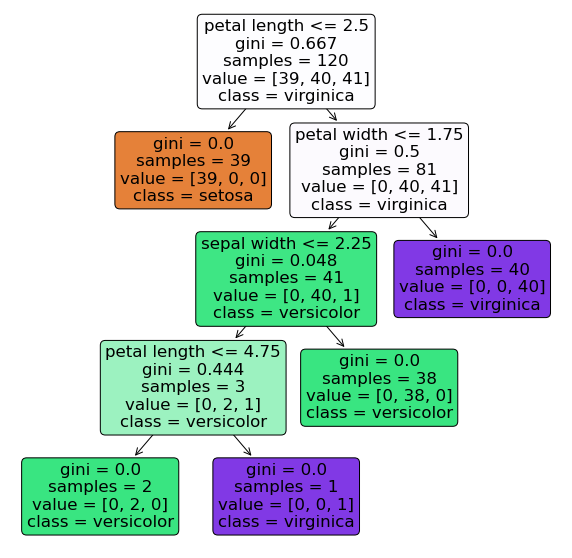

In [31]:
plt.figure(figsize=(10,10))
t = plot_tree(dt,feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],
             class_names=load_iris()['target_names'],
             filled=True,
             label='all',
             rounded=True)
plt.savefig('dt.jpg')

In [32]:
import mlflow

In [33]:
mlflow.set_experiment('DT')
with mlflow.start_run():
    mlflow.sklearn.log_model(dt,artifact_path='',registered_model_name='tree_model')
    mlflow.log_param('max_depth','7')
    mlflow.log_metric('accuracy',dt.score(X_test,y_test))
    mlflow.log_artifact('dt.jpg',artifact_path='plots')

ConnectionError: HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /api/2.0/mlflow/experiments/get-by-name?experiment_name=DT (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000147B5D903A0>: Failed to establish a new connection: [WinError 10061] Nenhuma conexão pôde ser feita porque a máquina de destino as recusou ativamente'))

In [34]:
import mlflow.pyfunc

In [35]:
model = mlflow.pyfunc.load_model(model_uri='models:/tree_model/Production')

ConnectionError: HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /api/2.0/preview/mlflow/registered-models/get-latest-versions?name=tree_model&stages=Production (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000147B5D904C0>: Failed to establish a new connection: [WinError 10061] Nenhuma conexão pôde ser feita porque a máquina de destino as recusou ativamente'))

In [ ]:
model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,model.predict(X_test))

Rodando no prompt:

Windows: set MLFLOW_TRACKING_URI=http://localhost:8000 <br>
Linux: export MLFLOW_TRACKING_URI=http://localhost:8000

O comando abaixo deve ser executado dentro do ambiente Anaconda<br>
mlflow models serve -m "models:/tree_model/Production"

In [ ]:
import requests
import pandas as pd

host = '127.0.0.1'
port = '5000'

url = f'http://{host}:{port}/invocations'

headers = {'Content-Type':'application/json'}

http_data = pd.DataFrame([X_test[0]],columns=['a','b','c','d']).to_json(orient='split')

r = requests.post(url=url, headers=headers, data=http_data)

print(f'Predictions: {r.text}')